<a href="https://colab.research.google.com/github/PineBiotech/omicslogic/blob/master/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, we import the necessary packages for data manipulation and visualization. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Then, we import the data. Remember, data has to be in the same folder or imported from a path. Depending on the type of file, use separators (comma, tab, etc.). You can also set a row of the table as "header". 

In [ ]:
#Read table:
df = pd.read_table('/content/sample_data/CellLines_ExprData.txt',sep='\t',header=(0))

#let's see what is in the data:
print(df)

                   id        184A1        184B5  ...    ZR751   ZR7530    ZR75B
0               Group  Normal-like  Normal-like  ...  Luminal  Luminal  Luminal
1     ENSG00000000419         6.06         5.25  ...     5.85     5.34     5.07
2     ENSG00000001036         4.47         5.39  ...     4.27     5.03     5.68
3     ENSG00000001084         4.47            6  ...     2.49     5.89     4.37
4     ENSG00000001497         5.27         4.27  ...     5.33     4.23     6.03
...               ...          ...          ...  ...      ...      ...      ...
6912  ENSG00000270016         0.04            0  ...        0     0.27        0
6913  ENSG00000270149         4.39         4.98  ...     5.38     3.93     3.99
6914  ENSG00000270161         4.09          3.9  ...     2.84     3.87     4.67
6915  ENSG00000270168         2.17          1.6  ...     7.68     5.25     7.21
6916  ENSG00000270170         3.99         4.65  ...     4.07     3.81     4.25

[6917 rows x 53 columns]


After we load the file, we need to store sample names - we will use these for annotating our plots later on. We also need to make sure the label names are correct - we can print them out and count how many we have using the `len()` function

In [ ]:
#Get 0 row and set a list of labels
labels_list = df.loc[[0]]

# make unique list of labels 
labels = np.unique(labels_list)
sample_names = df.loc[0]

sample_names = list(df)[1:]

print(sample_names)
len(sample_names)


['184A1', '184B5', '21MT1', '21NT', '21PT', '600MPE', 'AU565', 'BT474', 'BT483', 'BT549', 'CAMA1', 'EFM192A', 'EFM192B', 'EFM192C', 'HCC1143', 'HCC1395', 'HCC1419', 'HCC1428', 'HCC1569', 'HCC1806', 'HCC1937', 'HCC1954', 'HCC202', 'HCC3153', 'HCC38', 'HCC70', 'HS578T', 'JIMT1', 'LY2', 'MCF10A', 'MCF10F', 'MCF12A', 'MCF7', 'MDAMB134VI', 'MDAMB175VII', 'MDAMB231', 'MDAMB361', 'MDAMB453', 'MX1', 'SKBR3', 'SUM1315MO2', 'SUM149PT', 'SUM225CWN', 'SUM229PE', 'SUM52PE', 'T47D', 'T47D_Kbluc', 'UACC812', 'UACC893', 'ZR751', 'ZR7530', 'ZR75B']


52

The second row of our data has group labels, which we will need for visualziation. The rest of the data is numeric - we will need to transpose it to analyze samples as **objects** and genes as **features**.

In [ ]:
# delete "Group" label
labels = np.delete(labels, np.where(labels == 'Group'))

# Remove row "Group" at index 0 from data
data=df.drop([0])

# Remove id from axis
data=data.drop(['id'], axis=1)

data = data.transpose()

# Get list of all labels
flabels = labels_list.loc[0,:].values[1:]

print(flabels)

['Normal-like' 'Normal-like' 'Basal' 'Basal' 'Basal' 'Luminal' 'Luminal'
 'Luminal' 'Luminal' 'Claudin-low' 'Luminal' 'Luminal' 'Luminal' 'Luminal'
 'Basal' 'Claudin-low' 'Luminal' 'Luminal' 'Basal' 'Basal' 'Basal' 'Basal'
 'Luminal' 'Basal' 'Claudin-low' 'Basal' 'Claudin-low' 'Basal' 'Luminal'
 'Normal-like' 'Normal-like' 'Normal-like' 'Luminal' 'Luminal' 'Luminal'
 'Claudin-low' 'Luminal' 'Luminal' 'Basal' 'Luminal' 'Claudin-low' 'Basal'
 'Luminal' 'Basal' 'Luminal' 'Luminal' 'Luminal' 'Luminal' 'Luminal'
 'Luminal' 'Luminal' 'Luminal']


We can scale the data fitting into a single distribution for calculating variance across all samples.

In [ ]:
#Scale data
from sklearn.preprocessing import StandardScaler

scaled = StandardScaler()
scaled.fit(data)
scaled_data = scaled.transform(data)

After the data is scaled, we can run principle component analysis (PCA). You can set a number of principle components to calculate using the paramete `n_components`

In [ ]:
#Run Principal Component Analysis
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(scaled_data)
xpca = pca.transform(scaled_data)

To see how principle componenets explain variance and if they will show any kind of outliers, you can use boxplot visualization.

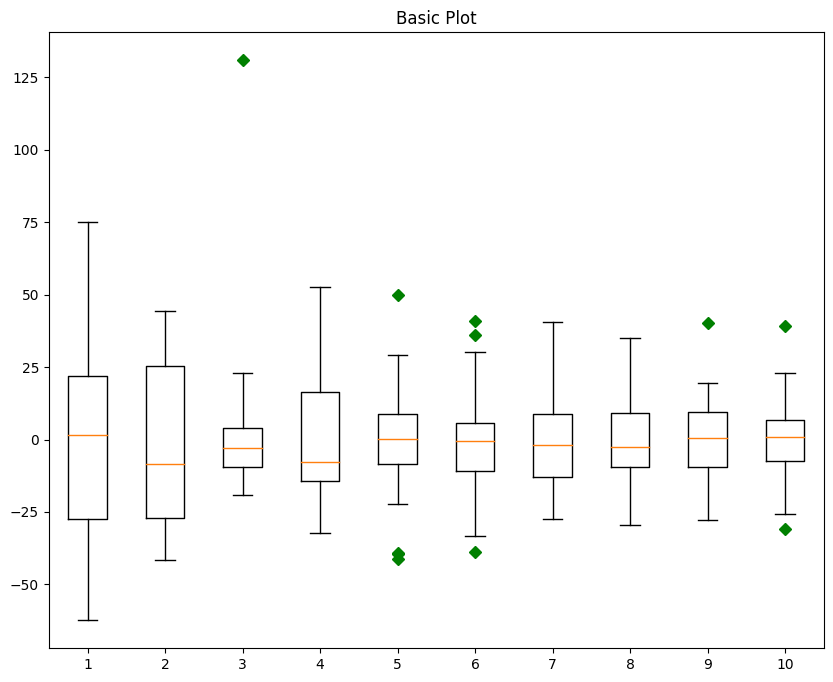

In [ ]:
#Boxplot of PC variance
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(xpca, 0, 'gD')

plt.rcParams['figure.figsize'] = [10, 8]
plt.show()

Now we can select which PCs to use for visualization, using a 2D scatterplot. We will use a `for` loop to go through all of the samples, taking X and y coordinates from the xpca results and the `sample_names` for annotation text

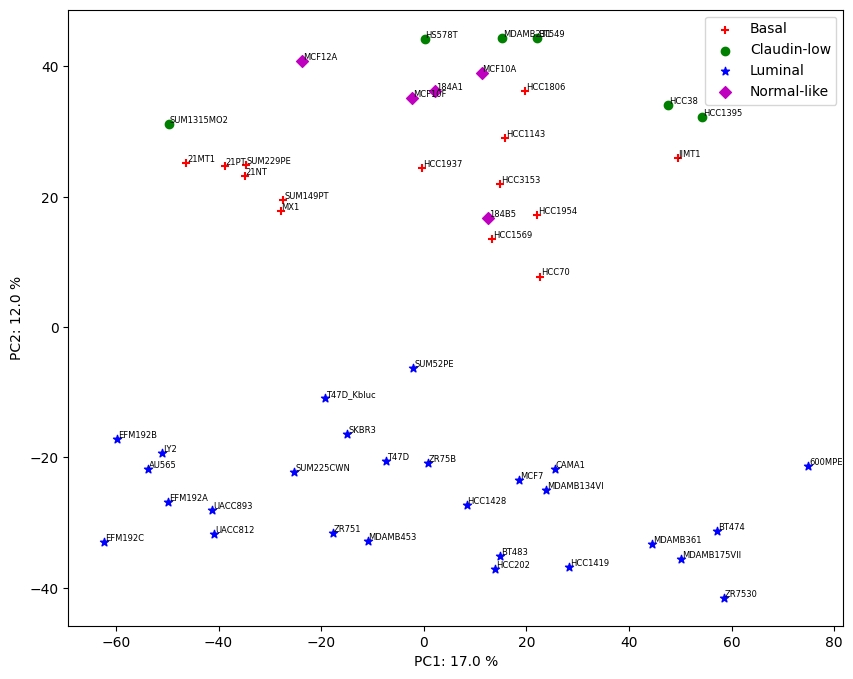

In [ ]:
#set which PCs to use
PC1 = 0
PC2 = 1

#Scatter plot, for loop through PCA data and check full labels list for group to set marker
for i in range(0, xpca.shape[0]):
    if flabels[i] == 'Basal':
        c1 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='r', marker='+')
        plt.text(xpca[i,PC1]+0.2,xpca[i,PC2]+0.2, sample_names[i], fontsize=6)
    elif flabels[i] == 'Claudin-low':
        c2 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='g', marker='o')
        plt.text(xpca[i,PC1]+0.2,xpca[i,PC2]+0.2, sample_names[i], fontsize=6)
    elif flabels[i] == 'Luminal':
        c3 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='b', marker='*')
        plt.text(xpca[i,PC1]+0.2,xpca[i,PC2]+0.2, sample_names[i], fontsize=6)
    elif flabels[i] == 'Normal-like':
        c4 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='m', marker='D')
        plt.text(xpca[i,PC1]+0.2,xpca[i,PC2]+0.2, sample_names[i], fontsize=6)

#Add labels to PCA scatterplot:
plt.legend([c1, c2, c3, c4],['Basal', 'Claudin-low', 'Luminal', 'Normal-like'])
plt.xlabel(f'PC1: {round(pca.explained_variance_ratio_[0],2)*100} %')
plt.ylabel(f'PC2: {round(pca.explained_variance_ratio_[1],2)*100} %')

#set plot size
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams['figure.figsize'] = [10, 8]
plt.show()